## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Unit 1 Sprint 3 Module 2

## Module Project: Inference for Linear Regression

### Learning Objectives

* identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables
* conduct and interpret a t-test for the slope parameter
* identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term.
* make the connection between the t-test for a population mean and a t-test for a slope coefficient.
* identify violations of the assumptions for linear regression

### Total notebook points: 16

## Introduction

### Statistical significance between head size and brain weight in healthy adult humans

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. 

The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.


**Use the above information to complete Tasks 1 - 10.**



Recall from the Module 1 Project that we were working with the brain weight variable (`Brain`) and the head size (`Head`) variables. We identified the dependent and independent variables, plotted our variables on the appropriate axes, and then described the strength of the relationship.

* `Brain` (brain weight in g) - **dependent** variable (y)
* `Head` (the head size in cubic cm - **independent** variable (x)

Now, we're going to bring back some statistics from Sprint 2 and look at the statistical association between head size and brain weight.



**Task 1** - Statistical tests

What type of statistical test will we use to determine if there is a statistically significant association between head size and brain weight in the population?  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: A beta test

B: A chi-square test

C: A Bayesian test

D: A t-test


In [ ]:
# Task 1

# YOUR CODE HERE
Answer = 'D'

**Task 1 Test**

In [ ]:
# Task 1 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 2** - Hypotheses for linear regression

Select the null and alternative hypotheses you would use to test for a statistically significant association between head size and brain weight.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: $H_0: \beta_1 = 0$ vs. $H_a: \beta_1 \neq 0$

B: A$H_0: \beta_0 = 0$ vs. $H_a: \beta_0 \neq 0$

C: $H_0: \beta_1 \neq 0$ vs. $H_a: \beta_1 = 0$

D: $H_0: \beta_0 = \beta_1 $ vs. $H_a: \beta_0 \neq \beta_1$


In [ ]:
# Task 2

# YOUR CODE HERE
Answer = 'A'

**Task 2 Test**

In [ ]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [2]:
# Task 3

# Imports
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url)

# Print out your DataFrame
print(df.head())

   Gender  Age  Head  Brain
0       1    1  4512   1530
1       1    1  3738   1297
2       1    1  4261   1335
3       1    1  3777   1282
4       1    1  4177   1590


**Task 3 Test** 

In [4]:
# Task 3 - Test
assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237

**Task 4** - Fit OLS model

Now, we're going to fit a regression model to our two variables. We're going to use `statsmodels.formula.api` and import the `ols` model. This import has been provided for you.

* Fit a model and name your variable `model`
* Using the `model.params[1]` method, assign the slope to the variable `slope`. Your variable should be a float (`numpy.float64`).
* Using the same `model.params[0]` method, assign the intercept to the variable `intercept`. Your variable should be a float (`numpy.float64`).
* Print out your model summary.

*Hint: Make sure to use the format Y ~ X for the model input.*

In [6]:
# Task 4

# Import statsmodels - DON'T Delete
from statsmodels.formula.api import ols

# Set-up and fit the model in one step
# (format Y ~ X)

#Linear Regression Model
model = ols('Brain~Head', data=df).fit()

#Model Parameters
intercept, slope = model.params
print('Intercept:', intercept)
print('Slope:', slope); print()

#Model Summary
print(model.summary())

Intercept: 325.5734210494421
Slope: 0.263429339489399

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           5.96e-54
Time:                        19:35:34   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

**Task 4 - Test**

In [ ]:
# Task 4 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Formulate the statistical model

Using the model parameters returned above, you will now write out the statistical model as a linear equation. Remember, we are predicting brain weight from head size.

* write your equation in Python
    * assign the dependent variable to `y_hat`
    * assign the independent variable to `x` with a value of `4000`
    * use the variables you created earlier for the slope and intercept

In [19]:
# Task 5

# YOUR CODE HERE
x = 4000 #Independent variable, head size, 4000 cm^3
y_hat = intercept + x*slope #Model prediction, brain weight, g
print(y_hat); print()

print("There is no observation for 4000 cm^3")
print("but there are values close to it")
print(df[ abs(4000 - df['Head']) < 10  ][ ['Head', 'Brain'] ] )

1379.290779007038

There is no observation for 4000 cm^3
but there are values close to it
     Head  Brain
11   3993   1380
70   4008   1468
158  4006   1302
182  4005   1280
207  3995   1296


**Task 5 - Test**

In [ ]:
# Task 5 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Statistical parameters

Now that we have fit a model, we're going to pull out the statistical parameters.

* assign the standard error to the variable `std_err`
* assign the value of the t-statistics to the variable `t_stat`
* assign the p-value for the slope to the variable `p_slope`

**Assign values out to the 1/1000 place (for example, `777.555`)**

In [66]:
# Task 6

# T-TEST FOR SLOPE
t_test = model.t_test([0,1]) #Takes in covariance matrix argument, [0,1] is default, NO IDEA WHAT THIS MEANS
print(t_test); print() #First dimension =0 corresponds to slope, =1 corresponds to intercept

#EXTRACTING VALUES FROM T-TEST
std_err = t_test.sd[0][0].round(3); print("Standard Error:", std_err)
t_stat = t_test.tvalue[0][0].round(3); print("T-Stat:", t_stat)
p_slope = t_test.pvalue.round(3); print("P-value:", p_slope)
print()

# INFORMATION SUMMARY
print(model.summary()); print()

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2634      0.013     20.409      0.000       0.238       0.289

Standard Error: 0.013
T-Stat: 20.409
P-value: 0.0

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           5.96e-54
Time:                        21:16:03   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.


**Task 6 - Test**

In [ ]:
# Task 6 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Hypothesis Test

Conduct your hypothesis test and select the answer below that best describes the conclusion at the 0.05 significance level.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis and conclude there is no association between head size and brain weight.

B: We reject the null hypothesis and conclude there is an association between head size and brain weight.

C: We fail to reject the null hypothesis and conclude there is no association between head size and brain weight.

D: We fail to reject the null hypothesis and conclude there is an association between head size and brain weight.


In [69]:
# Task 7

# YOUR CODE HERE

Answer = 'B'

**Task 7 Test**

In [ ]:
# Task 7 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Hypothesis Test for the intercept

Conduct a hypothesis test for the intercept and select the answer below that best describes the conclusion at the 0.05 significance level.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis and conclude there is no association between head size and brain weight.

B: We fail to reject the null hypothesis and conclude there is no association between head size and brain weight.

C: It does not make sense to interpret or conduct a hypothesis test for the intercept because 0 is not a value of x in our dataset.

D: It does not make sense to interpret or conduct a hypothesis test for the intercept because the slope is statistically significant.


In [79]:
# Task 8

# VALUE-RANGE OF INDEPENDENT VARIABLE
print('Head Size Sample Range = [', df['Head'].min(), df['Head'].max(), ']'); print()

# T-TEST FOR INTERCEPT
t_test2 = model.t_test([1,1]) #Takes in covariance matrix argument, [0,1] is default, NO IDEA WHAT THIS MEANS
print(t_test2); print() #First dimension =0 corresponds to slope, =1 corresponds to intercept

#EXTRACTING VALUES FROM T-TEST
std_err2 = t_test2.sd[0][0].round(3); print("Standard Error:", std_err2)
t_stat2 = t_test2.tvalue[0][0].round(3); print("T-Stat:", t_stat2)
p_slope2 = t_test2.pvalue.round(3); print("P-value:", p_slope2)
print()

Answer = 'C'

Head Size Sample Range = [ 2720 4747 ]

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           325.8369     47.128      6.914      0.000     232.989     418.684

Standard Error: 47.128
T-Stat: 6.914
P-value: 0.0



**Task 8 Test**

In [ ]:
# Task 8 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Confidence Interval

Calculate the 95% confidence interval for your slope term. Use your model summary to find these values. Assign them values out to the 1/1000 place (for example, `ci_low = 0.345`)

* assign the lower value of brain size to `brain_low`
* assign the upper value of brain size to `brain_upper`


In [101]:
# Task 9

# YOUR CODE HERE

#CONFIDENCE INTERVAL
ci = model.conf_int(alpha=0.05)
brain_low =  ci[0][1].round(3)
brain_upper =  ci[1][1].round(3)
print("Lower Bound for Slope:", brain_low)
print("Upper Bound for Slope:", brain_upper)
print()

# INFORMATION SUMMARY
print(model.summary()); print()

Lower Bound for Slope: 0.238
Upper Bound for Slope: 0.289

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           5.96e-54
Time:                        21:42:13   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**Task 9 - Test**

In [ ]:
# Task 9 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Plot confidence intervals

Plot the confidence limits on both the slope and intercept terms with a shaded area around our regression line. The easiest way to do this is using `seaborn` with the `ci` parameter set to the confidence level you want (the default is `ci=95`). This plot will not be autograded.

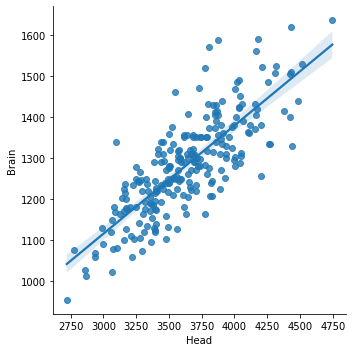

In [114]:
# Task 10

# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Head', y='Brain', data=df, ci=95);
plt.show()

**Task 10** - Correlation (short answer)

Does it seem plausible that larger head size causes greater brain weight?  Or is it possible that something else causes differences in both of those factors?

ANSWER: It does not seem plausible that a larger head size *causes* greater brain weight. The opposite would make more sense from an evolutionary perspective, but any causal relationship would be ultimately be determined by structural constraints that we have no reason to suspect are linear. 



## Part B

### Sleep Data

Use the following information to answer Tasks 11 - 18 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below. 

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 11**

Before we can look at the data, we need to load in the data. The URL has been provided.

* load in the CSV file as a DataFrame and assign it to the variable `df_sleep`
* make sure to view the DataFrame!

In [115]:
# Task 11

data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
print(df_sleep.head())

                      Animal      Body   Brain  ...  Pred  Exposure  Danger
0  African_giant_pouched_rat     1.000     6.6  ...     3         1       3
1             Asian_elephant  2547.000  4603.0  ...     3         5       4
2                     Baboon    10.550   179.5  ...     4         4       4
3              Big_brown_bat     0.023     0.3  ...     1         1       1
4            Brazilian_tapir   160.000   169.0  ...     4         5       4

[5 rows x 11 columns]


**Task 11 - Test**

In [116]:
# Task 11 - Test

assert isinstance(df_sleep, pd.DataFrame), 'Have you created a DataFrame named `df_sleep`?'
assert len(df_sleep) == 42


**Task 12** - Plot to check for linearity

Plot the relationship between *gestation time* and time spent in *dreaming sleep*. This plot will not be autograded.

* you can use `seaborn` for your plot, with the `regplot()` or `lmplot()`
* include the regression line but turn off the confidence interval (`ci=None`)

Select the answer that best describes the relationship between gestation time and time spent in dreaming sleep. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: Gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure seems to fit the data well.

B: Gestation time and time spent in dreaming sleep appear to have a non-linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

C: Gestation time and time spent in dreaming sleep appear to have no relationship.  The linear regression line shown in the figure seems to fit the data well.

D: Gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

Index(['Animal', 'Body', 'Brain', 'SWsleep', 'Parasleep', 'Totsleep', 'Life',
       'Gest', 'Pred', 'Exposure', 'Danger'],
      dtype='object')




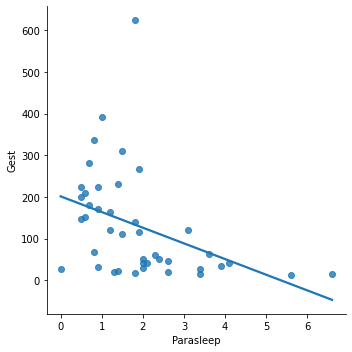

In [119]:
# Task 12

# YOUR CODE HERE

print(df_sleep.columns); print()

sns.lmplot(x='Parasleep', y='Gest', data=df_sleep, ci=None); print()

Answer = 'B'

**Task 12 Test**

In [ ]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Transform a variable

Let's try something new: taking the log of a variable to transform it. Then we'll look at the relationship between the log of that variable and the other variable (which will remain the same)

* Create a new variable with the log of gestational time and add it as a column to `df_sleep` with the name `log_gest` 

*Hint: use the natural log `np.log()`*

In [121]:
# Task 13

# YOUR CODE HERE
df_sleep['log_gest'] = np.log(df_sleep['Gest'])

# Look at your new column
print(df_sleep.head())

                      Animal      Body   Brain  ...  Exposure  Danger  log_gest
0  African_giant_pouched_rat     1.000     6.6  ...         1       3  3.737670
1             Asian_elephant  2547.000  4603.0  ...         5       4  6.436150
2                     Baboon    10.550   179.5  ...         4       4  5.192957
3              Big_brown_bat     0.023     0.3  ...         1       1  3.555348
4            Brazilian_tapir   160.000   169.0  ...         5       4  5.971262

[5 rows x 12 columns]


**Task 13 - Test**

In [ ]:
# Task 13 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 14** - Plot a new relationship

Plot the relationship between *log of gestation time* and time spent in *dreaming sleep*. This plot will not be autograded.

* you can use `seaborn` for your plot, with the `regplot()` or `lmplot()`
* include the regression line but turn off the confidence interval (`ci=None`)

Select the answer that best describes the relationship between the log of gestation time and time spent in dreaming sleep. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: The log of gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure seems to fit the data well.

B: The log of gestation time and time spent in dreaming sleep appear to have a non-linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

C: The log of gestation time and time spent in dreaming sleep appear to have no relationship.  The linear regression line shown in the figure seems to fit the data well.

D: The log of gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

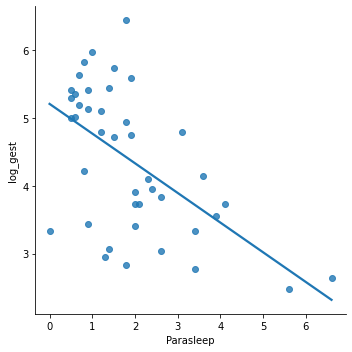

In [122]:
# Task 14

# YOUR CODE HERE
sns.lmplot(x='Parasleep', y='log_gest', data=df_sleep, ci=None); print()

Answer = 'D'

**Task 14 Test**

In [ ]:
# Task 14 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 15** - Model the sleep data

Next, create a model of the relationship between the log of gestation time and dreaming sleep using the `statsmodels.formula.api`. Remember that the `statsmodels` import was made earlier.

* Fit a OLS model and assign it to the variable `model_sleep` (remember to enter the model in the format Y ~ X).
* Print out your model summary.
* Answer the questions below to interpret your results.

In [ ]:
# Task 15

# YOUR CODE HERE
raise NotImplementedError()

# Print the model summary
print(model_sleep.summary())

**Task 15 Test**

In [ ]:
# Task 15 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 16** - Statistical significance of sleep data (short answer)

Is the *log of gestational time* statistically significantly associated with time spent in *dreaming sleep* at the alpha = 0.05 level?

ANSWER:

**Task 17** - Predicting dreaming sleep from gestation time

The final task! Using the model we just created, predict the amount of dreaming sleep for a mammal that gestates her young for 262 days (this is the gestation time).

* Assign the gestation time to the variable `x_predict`. This variable will be an integer.
* Take the log of `x_predict` and assign it to the variable `ln_x_predict`. THis variable will be a float.
* Use the `slope` and `intercept` variables from your `model_sleep` to complete the calculation. 
* Your result should be a float and assigned to the variable `sleep_predict`.

In [ ]:
# Task 17

# YOUR CODE HERE
raise NotImplementedError()

# Print out the log of x and the predicted sleep value
print('ln 262 = ', ln_x_predict)
print('Predicted dreaming sleep = ', sleep_predict)

**Task 17 Test**

In [ ]:
# Task 16

assert ln_x_predict == np.log(x_predict), 'Did you use the correct log calculation?'

